In [119]:
%matplotlib inline

In [120]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.constants as const
c = const.c.cgs.value

In [121]:
# BHR71
# corrected = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/bhr71_spire_corrected.fits'
corrected = '/Users/yaolun/bhr71/bhr71_SECT/spire_bhr71_corrected_32asGRB.fits'
extended = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_extended_apod.fits'
point = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
corrected_16as = '/Users/yaolun/bhr71/bhr71_SECT/bhr71_16as_beam.fits'

# L1157
# corrected = '/Users/yaolun/test/L1157/l1157_spire_corrected.fits'
# extended = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_extended_apod.fits'
# point = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_point_apod.fits'

hdu_corrected = fits.open(corrected) # SLWC3:  2; SSWD4:  3 for BHR71; for others, SLWC3: 5, SSWD4: 18 
hdu_extended = fits.open(extended)   # SLWC3: 11; SSWD4: 39
hdu_point = fits.open(point)         # SLWC3:  5; SSWD4: 18
hdu_16as = fits.open(corrected_16as)

pix_slw = np.pi/4.*34**2
pix_ssw = np.pi/4.*19**2

# get the spectra from FITS file
# BHR71
wl_slw_cor = c/1e5/hdu_corrected[2].data.field(0)[3:-3]
flux_slw_cor = hdu_corrected[2].data.field(1)[3:-3]
wl_ssw_cor = c/1e5/hdu_corrected[3].data.field(0)[3:-3]
flux_ssw_cor = hdu_corrected[3].data.field(1)[3:-3]
# other
# wl_slw_cor = c/1e5/hdu_corrected[5].data.field(0)[3:-3]
# flux_slw_cor = hdu_corrected[5].data.field(1)[3:-3]
# wl_ssw_cor = c/1e5/hdu_corrected[18].data.field(0)[3:-3]
# flux_ssw_cor = hdu_corrected[18].data.field(1)[3:-3]

wl_slw_16as = c/1e5/hdu_16as[2].data.field(0)[3:-3]
flux_slw_16as = hdu_16as[2].data.field(1)[3:-3]
wl_ssw_16as = c/1e5/hdu_16as[3].data.field(0)[3:-3]
flux_ssw_16as = hdu_16as[3].data.field(1)[3:-3]

wl_slw_ext = c/1e5/hdu_extended[11].data.field(0)
flux_slw_ext = hdu_extended[11].data.field(1)*pix_slw*(np.pi/180./3600.)**2*1e26
wl_ssw_ext = c/1e5/hdu_extended[39].data.field(0)
flux_ssw_ext = hdu_extended[39].data.field(1)*pix_ssw*(np.pi/180./3600.)**2*1e26

wl_slw_pot = c/1e5/hdu_point[5].data.field(0)
flux_slw_pot = hdu_point[5].data.field(1)
wl_ssw_pot = c/1e5/hdu_point[18].data.field(0)
flux_ssw_pot = hdu_point[18].data.field(1)

In [122]:
# read PACS spectrum
wl_pacs, flux_pacs = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/pacs/data/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',\
                                   skip_header=1).T

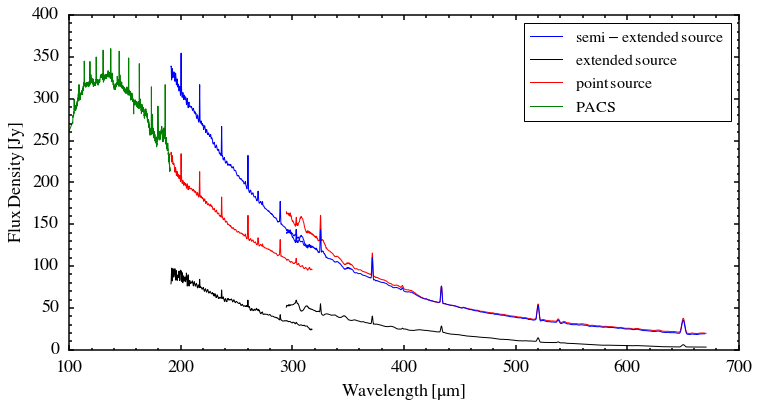

In [123]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ext, = ax.plot(wl_slw_ext, flux_slw_ext, 'k-', linewidth=1)
ax.plot(wl_ssw_ext, flux_ssw_ext, 'k-', linewidth=1)
pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', linewidth=1)
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-', linewidth=1)
cor, = ax.plot(wl_slw_cor, flux_slw_cor, 'b-', linewidth=1)
ax.plot(wl_ssw_cor, flux_ssw_cor, 'b-', linewidth=1)
# cor_16as, = ax.plot(wl_slw_16as, flux_slw_16as, '-', color='Magenta', linewidth=1)
# ax.plot(wl_ssw_16as, flux_ssw_16as, '-', color='Magenta', linewidth=1)

# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', linewidth=1)

ax.legend([cor, ext, pot, pacs], \
          [r'$\rm{semi-extended\,source}$', r'$\rm{extended\,source}$', r'$\rm{point\,source}$', r'$\rm{PACS}$'],\
          numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_correction_com.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Experiment about SPIRE point source corrected datacube

In [6]:
filename = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
hdu = fits.open(filename)

In [7]:
# SLW
wl_slw_sum = c/1e5/hdu[2].data.field(0)
flux_slw_sum = np.zeros_like(hdu[2].data.field(1))
for i in range(2,9):
    flux_slw_sum += hdu[i].data.field(1)
    
# SSW
wl_ssw_sum = c/1e5/hdu[13].data.field(0)
flux_ssw_sum = np.zeros_like(hdu[13].data.field(1))
for i in [13,14,17,18,21,22]:
    flux_ssw_sum += hdu[i].data.field(1)

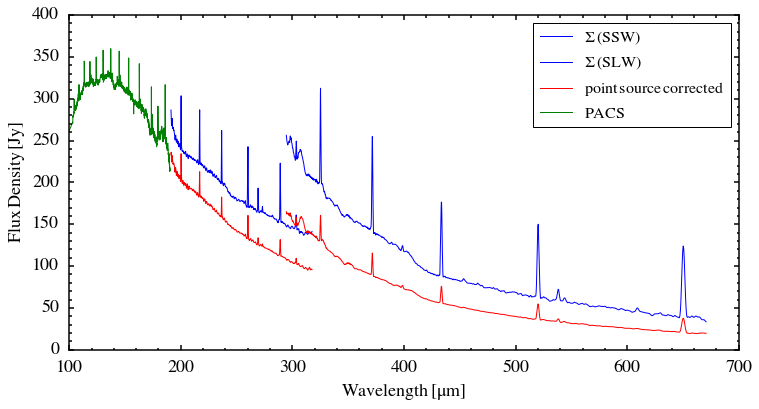

In [8]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', label=r'$\rm{point\,source\,corrected}$')
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-')
# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)


## Weight the SPIRE spaxel based on a reference Gaussian beam with an equivalent aperture of PACS 3x3 aperture

### SSW

In [20]:
filename = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
hdu = fits.open(filename)

# read in the SSW beam profile
wl_ssw_beam, diam_ssw_beam = np.genfromtxt('/Users/yaolun/test/SSW_beam_profile.txt').T

from scipy.interpolate import interp1d
f = interp1d(wl_ssw_beam, diam_ssw_beam)

# A re-sample function
def resample(x, skip=1, freq=False):
    # need to resample in frequency space
    import astropy.constants as const
    c = const.c.cgs.value
    # assume x in um
    if not freq:
        x = c/x
    xx = []
    for i in range(len(x)):
        if i % skip == 0:
            xx.append(x[i])
    if not freq:
        xx = c/np.array(xx)
    return xx

# Numerically Gaussian integral within a certain aperture at a given location
def Gaussian_anywhere(ra_offset, dec_offset, radius, size=701., phys_size=70.):
    # Create a 2-D cartian grid for mapping 2-D Gaussian
    def gauss2d(x, y, sigmax, sigmay=None):
        # sigmax needs to be in pixel coordinates
        if sigmay == None:
            sigmay = sigmax
        return 1/(2*np.pi*sigmax*sigmay) * np.exp( -(x**2/2./sigmax**2 + y**2/2./sigmay**2) )
    
    grid_x, grid_y = np.meshgrid(np.linspace(0,size-1,size), np.linspace(0,size-1,size))
    grid_x = grid_x - (size-1)/2.
    grid_y = grid_y - (size-1)/2.
    grid_gauss2d = gauss2d(grid_x,grid_y, sigmax=(size-1)/phys_size*13.5)
    dA = ((1/((size-1)/2.))*phys_size)**2

    # convert from physcial coordinates to pixel coordinates
    x = (ra_offset-phys_size/2.) * (size-1)/2./(phys_size/2.) + (size-1)/2.
    y = (dec_offset-phys_size/2.) * (size-1)/2./(phys_size/2.) + (size-1)/2.
    r_pix = radius * (size-1)/phys_size
    grid_dist = ((grid_x-x)**2+(grid_y-y)**2)**0.5
    gauss2d_mask = np.where(grid_dist<=r_pix, grid_gauss2d,0)
    
    return np.sum(gauss2d_mask)
    
r_ref = 19.

cen_ra = hdu[18].header['RA']
cen_dec = hdu[18].header['DEC']

wave = c/1e5/hdu[18].data.field(0)
weight_ssw = np.zeros((6,len(wave)))
weight_ssw_cen = np.zeros(len(wave))
beam_ref = np.zeros(6)

ind_cen = 18
#
ra_cen = (hdu[ind_cen].header['RA']-cen_ra)*np.cos(np.radians(cen_dec)) * 3600.
dec_cen = (hdu[ind_cen].header['DEC']-cen_dec) * 3600.
# for the center spaxel only
for iw in range(len(wave)):
    r0 = diam_ssw_beam[iw]
    weight_ssw_cen[iw] = Gaussian_anywhere(ra_cen, dec_cen, r0)
#

s = 0
for i in [13,14,17,18,21,22]:
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    # map a 70" x 70" grid
    wave_dum = c/1e5/hdu[i].data.field(0)
    # Find the Gaussian intrgral within a reference beam size of 19"
    beam_ref[s] = Gaussian_anywhere(ra_dum, dec_dum, r_ref)
    
    for iw in range(len(wave_dum)):
        weight_ssw[s,iw] = beam_ref[s]/weight_ssw_cen[iw]
    s += 1

In [21]:
# save the SSW weight array
np.save('/Users/yaolun/bhr71/bhr71_ssw_weight', weight_ssw)
# For loading in
# data = np.load('/Users/yaolun/bhr71/bhr71_ssw_weight.npy')

In [23]:
# create empty arrays and apply the weighting
wl_ssw_wsum = c/1e5/hdu[18].data.field(0)
flux_ssw_wsum = np.zeros_like(wl_ssw_wsum)

for iw in range(len(wl_ssw_wsum)):
    s = 0
    for i in [13,14,17,18,21,22]:
        flux_dum = hdu[i].data.field(1)
        flux_ssw_wsum[iw] += flux_dum[iw] * weight_ssw[s,iw]
        s += 1

In [24]:
# sort the spectrum with the increase of wavelength
sorter = np.argsort(wl_ssw_wsum)
wl_ssw_wsum = wl_ssw_wsum[sorter]
flux_ssw_wsum = flux_ssw_wsum[sorter]
# write the summed spectrum into ASCII file
foo = open('/Users/yaolun/test/bhr71_ssw_weighted_sum.txt','w')
for wave in wl_ssw_wsum:
    foo.write('{} \t {}\n'.format(wave, flux_ssw_wsum[wl_ssw_wsum == wave][0]))
foo.close()

### SLW

In [165]:
r_ref = 19.

# read in the SSW beam profile
wl_slw_beam, diam_slw_beam = np.genfromtxt('/Users/yaolun/test/SLW_beam_profile.txt').T

cen_ra = hdu[5].header['RA']
cen_dec = hdu[5].header['DEC']

wave = c/1e5/hdu[5].data.field(0)
weight_slw = np.zeros((7,len(wave)))
weight_slw_cen = np.zeros(len(wave))
beam_ref = np.zeros(7)

ind_cen = 5
#
ra_cen = (hdu[ind_cen].header['RA']-cen_ra)*np.cos(np.radians(cen_dec)) * 3600.
dec_cen = (hdu[ind_cen].header['DEC']-cen_dec) * 3600.
# for the center spaxel only
for iw in range(len(wave)):
    r0 = diam_slw_beam[iw]
    weight_slw_cen[iw] = Gaussian_anywhere(ra_cen, dec_cen, r0)
#

s = 0
for i in [2,3,4,5,6,7,8]:
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    # map a 70" x 70" grid
    wave_dum = c/1e5/hdu[i].data.field(0)
    # Find the Gaussian intrgral within a reference beam size of 35"
    beam_ref[s] = Gaussian_anywhere(ra_dum, dec_dum, r_ref)
    
    for iw in range(len(wave_dum)):
        weight_slw[s,iw] = beam_ref[s]/weight_slw_cen[iw]
#         r0 = diam_ssw_beam[iw]
#         weight_slw[s,iw] = Gaussian_anywhere(ra_dum, dec_dum, r0)/weight_slw_cen[iw]
    s += 1

In [132]:
# save the SSW weight array
np.save('/Users/yaolun/bhr71/bhr71_slw_weight', weight_slw)
# For loading in
data = np.load('/Users/yaolun/bhr71/bhr71_slw_weight.npy')

In [166]:
# create empty arrays and apply the weighting
wl_slw_wsum = c/1e5/hdu[5].data.field(0)
flux_slw_wsum = np.zeros_like(wl_slw_wsum)

for iw in range(len(wl_slw_wsum)):
    s = 0
    for i in [2,3,4,5,6,7,8]:
        flux_dum = hdu[i].data.field(1)
        flux_slw_wsum[iw] += flux_dum[iw] * weight_slw[s,iw]
        s += 1

In [167]:
# sort the spectrum with the increase of wavelength
sorter = np.argsort(wl_slw_wsum)
wl_slw_wsum = wl_slw_wsum[sorter]
flux_slw_wsum = flux_slw_wsum[sorter]
# write the summed spectrum into ASCII file
foo = open('/Users/yaolun/test/bhr71_slw_weighted_sum.txt','w')
for wave in wl_slw_wsum:
    foo.write('{} \t {}\n'.format(wave, flux_slw_wsum[wl_slw_wsum == wave][0]))
foo.close()

## Go fit the continuum in IDL...

In [159]:
# read in SECT-corrected speatrum and continuum
wl_cor_cont, flux_cor_cont = np.genfromtxt('/Users/yaolun/bhr71/bhr71_SECT/BHR71_spire_corrected_continuum.txt', skip_header=1, dtype='float').T
wl_cor_raw, flux_cor_raw = np.genfromtxt('/Users/yaolun/bhr71/bhr71_SECT/spire/data/BHR71_spire_corrected.txt',skip_header=1).T

Trimming scheme:

-SPIRE-

SSW: 195 < $\lambda$ <= 310 $\mu$m

SLW: $\lambda$ > 310 $\mu$m

In [93]:
# Output the SECT-corrected spectra by modules
sect = fits.open('/Users/yaolun/bhr71/bhr71_SECT/spire_bhr71_corrected_32asGRB.fits')
wl_sect_slw = c/1e5/sect[2].data.field(0)
flux_sect_slw = sect[2].data.field(1)
wl_sect_ssw = c/1e5/sect[3].data.field(0)
flux_sect_ssw = sect[3].data.field(1)

# write the spectrum of each SECT-corrected module into ASCII file
foo = open('/Users/yaolun/bhr71/bhr71_SECT/bhr71_SECT_slw.txt','w')
for wave in wl_sect_slw:
    foo.write('{} \t {}\n'.format(wave, flux_sect_slw[wl_sect_slw == wave][0]))
foo.close()

foo = open('/Users/yaolun/bhr71/bhr71_SECT/bhr71_SECT_ssw.txt','w')
for wave in wl_sect_ssw:
    foo.write('{} \t {}\n'.format(wave, flux_sect_ssw[wl_sect_ssw == wave][0]))
foo.close()

In [160]:
# Read the SECT-corrected continuum spectrum of each modules
wl_sect_slw_cont, flux_sect_slw_cont = np.genfromtxt('/Users/yaolun/bhr71/bhr71_SECT/fitting_SECT/bhr71_SECT_slw_continuum.txt', skip_header=1).T
wl_sect_ssw_cont, flux_sect_ssw_cont = np.genfromtxt('/Users/yaolun/bhr71/bhr71_SECT/fitting_SECT/bhr71_SECT_ssw_continuum.txt', skip_header=1).T

### Read in the continuum-only spectrum

In [168]:
wl_ssw_cont, flux_ssw_cont = np.genfromtxt('/Users/yaolun/test/bhr71_weighted/fitting/bhr71_ssw_weighted_sum_continuum.txt', skip_header=1, dtype='float').T
wl_slw_cont, flux_slw_cont = np.genfromtxt('/Users/yaolun/test/bhr71_weighted/fitting/bhr71_slw_weighted_sum_continuum.txt', skip_header=1, dtype='float').T

# wl_cor_cont, flux_cor_cont = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/spire/advanced_products/BHR71_spire_corrected_continuum.txt', skip_header=1, dtype='float').T

# wl_ssw_cor_raw = c/1e5/hdu_corrected[3].data.field(0)
# flux_ssw_cor_raw = hdu_corrected[3].data.field(1)

In [156]:
# Trim spectra
# SSW
flux_ssw_cor_cont = flux_cor_cont[(wl_cor_cont <= max(wl_ssw_cont))]
wl_ssw_cor_cont = wl_cor_cont[(wl_cor_cont <= max(wl_ssw_cont))]

flux_ssw_cont = flux_ssw_cont[wl_ssw_cont >= min(wl_ssw_cor_cont)]
wl_ssw_cont = wl_ssw_cont[wl_ssw_cont >= min(wl_ssw_cor_cont)]

flux_ssw_cor_trim = flux_cor_raw[(wl_cor_raw >= min(wl_ssw_cont)-0.01) & (wl_cor_raw <= max(wl_ssw_cont)+0.01)]
wl_ssw_cor_trim = wl_cor_raw[(wl_cor_raw >= min(wl_ssw_cont)-0.01) & (wl_cor_raw <= max(wl_ssw_cont)+0.01)]

# SLW
flux_slw_cor_cont = flux_cor_cont[(wl_cor_cont <= max(wl_slw_cont)+0.01) & (wl_cor_cont >= min(wl_slw_cont)-0.01)]
wl_slw_cor_cont = wl_cor_cont[(wl_cor_cont <= max(wl_slw_cont)+0.01) & (wl_cor_cont >= min(wl_slw_cont)-0.01)]

flux_slw_cont = flux_slw_cont[(wl_slw_cont >= min(wl_slw_cor_cont)-0.01) & (wl_slw_cont <= max(wl_slw_cor_cont)+0.01)]
wl_slw_cont = wl_slw_cont[(wl_slw_cont >= min(wl_slw_cor_cont)-0.01) & (wl_slw_cont <= max(wl_slw_cor_cont)+0.01)]

flux_slw_cor_trim = flux_cor_raw[(wl_cor_raw >= min(wl_slw_cont)-0.01) & (wl_cor_raw <= max(wl_slw_cont)+0.01)]
wl_slw_cor_trim = wl_cor_raw[(wl_cor_raw >= min(wl_slw_cont)-0.01) & (wl_cor_raw <= max(wl_slw_cont)+0.01)]

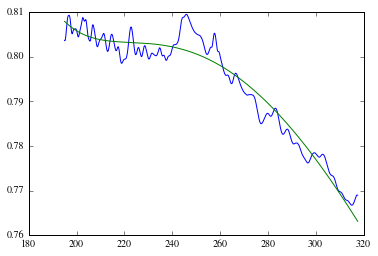

In [169]:
# compare with the SECT-corrected spectrum
# SSW
raw_ssw_ratio = flux_ssw_cont/flux_sect_ssw_cont
plt.plot(wl_ssw_cont[wl_ssw_cont >= 195.], raw_ssw_ratio[wl_ssw_cont >= 195.])
from scipy.signal import savgol_filter
# trim the spectrum because the smoothing requires the window length be an odd number
raw_ssw_ratio_trim = raw_ssw_ratio[wl_ssw_cont >= 195.]
ratio_ssw_smooth = savgol_filter(raw_ssw_ratio_trim, len(raw_ssw_ratio_trim)-1, 3)
plt.plot(wl_ssw_cont[wl_ssw_cont > 195.], ratio_ssw_smooth)

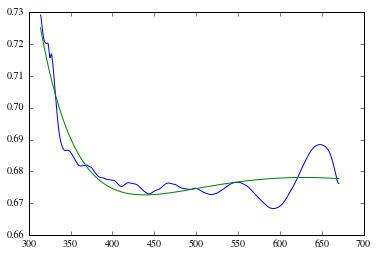

In [170]:
# compare with the SECT-corrected spectrum
# SLW
raw_slw_ratio = flux_slw_cont/flux_sect_slw_cont
plt.plot(wl_slw_cont[wl_slw_cont > 310.], raw_slw_ratio[wl_slw_cont > 310.])
from scipy.signal import savgol_filter
# trim the spectrum because the smoothing requires the window length be an odd number
raw_slw_ratio_trim = raw_slw_ratio[wl_slw_cont > 310.]
ratio_slw_smooth = savgol_filter(raw_slw_ratio_trim, len(raw_slw_ratio_trim)-1, 3)
plt.plot(wl_slw_cont[wl_slw_cont > 310.], ratio_slw_smooth)

[  944.04644881   944.34624407   944.64603632 ...,  1567.31497265
  1567.61476367  1567.9145546 ]


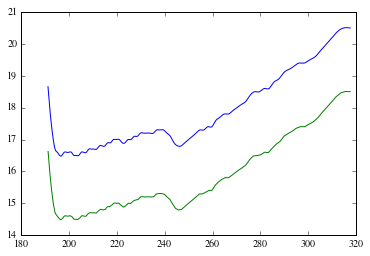

In [132]:
# read in the SSW beam profile
wl_ssw_beam, diam_ssw_beam = np.genfromtxt('/Users/yaolun/test/SSW_beam_profile.txt').T
freq_ssw_beam = c/wl_ssw_beam/1e5
print freq_ssw_beam
freq = []
diam = []
for i in range(len(freq_ssw_beam)):
    if i % 20 == 0:
        freq.append(freq_ssw_beam[i])
        diam.append(diam_ssw_beam[i])
plt.plot(wl_ssw_beam, diam_ssw_beam)
plt.plot(c/np.array(freq)/1e5, np.array(diam)-2)

[ 248.785   248.743   248.578  ...,   94.5274   94.6138   94.69  ]


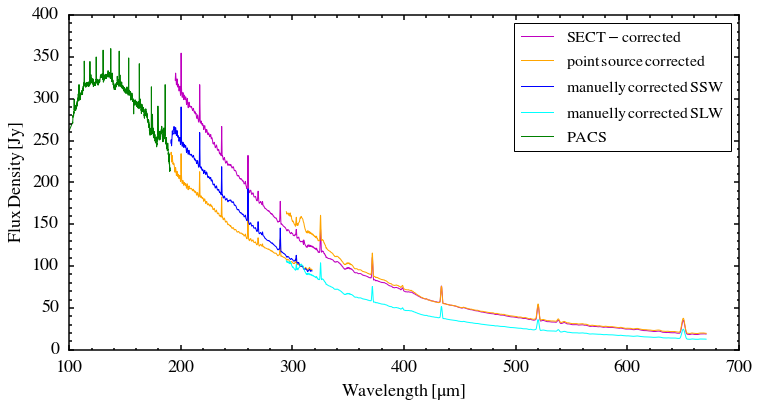

In [178]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
# ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

# ax.plot(wl_ssw_cont, flux_ssw_cont, 'k-', label=r'$\rm{weighted\,cont.\,SSW}$')
# ax.plot(wl_slw_cont, flux_slw_cont, '-', color='Gray', label=r'$\rm{weighted\,cont.\,SLW}$')

# ax.plot(wl_ssw_cor_cont, flux_ssw_cor_cont, 'm-', label=r'$\rm{SECT-corrected}$')

ax.plot(wl_cor_raw, flux_cor_raw, 'm-', label=r'$\rm{SECT-corrected}$')

# ax.plot(wl_ssw_cor_trim, flux_ssw_cor_trim*ratio_smooth, color='Red', linestyle='-', label=r'$\rm{Ult-corrected}$')

pot, = ax.plot(wl_slw_pot, flux_slw_pot, '-', color='Orange', label=r'$\rm{point\,source\,corrected}$')
ax.plot(wl_ssw_pot, flux_ssw_pot, '-', color='Orange')

ax.plot(wl_ssw_wsum, flux_ssw_wsum, 'b-', label=r'$\rm{manuelly\,corrected\,SSW}$')
ax.plot(wl_slw_wsum, flux_slw_wsum, '-', color='Cyan', label=r'$\rm{manuelly\,corrected\,SLW}$')

# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_sum.pdf',format='pdf',dpi=300, bbox_inches='tight')